In [3]:
from tokenize import group
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense,Embedding, BatchNormalization
import matplotlib.pyplot as plt
group_size = 7
total = []
data = pd.read_excel('1.xlsx',sheet_name='Sheet1')
df = pd.DataFrame(data, columns= ['A+','A-','B+','B-', 'AB+', 'AB-', 'O+','O-'])
list = df.values.tolist()

In [4]:
total = np.array(list)
x = []
y = []
for i in range(len(list)-group_size):
    temp = total[i:i+group_size]
    x.append(temp)
    y.append(total[i+group_size])
x = np.array(x)
y = np.array(y)

In [5]:

train_x = x[:500]
train_y = y[:500]
test_x = x[500:]
test_y = y[500:]

train_x


array([[[8, 0, 3, ..., 0, 1, 2],
        [4, 0, 4, ..., 0, 3, 2],
        [2, 0, 3, ..., 0, 4, 0],
        ...,
        [4, 2, 5, ..., 0, 3, 0],
        [8, 2, 4, ..., 0, 4, 0],
        [5, 0, 1, ..., 0, 6, 3]],

       [[4, 0, 4, ..., 0, 3, 2],
        [2, 0, 3, ..., 0, 4, 0],
        [5, 0, 6, ..., 0, 7, 3],
        ...,
        [8, 2, 4, ..., 0, 4, 0],
        [5, 0, 1, ..., 0, 6, 3],
        [8, 0, 3, ..., 0, 4, 0]],

       [[2, 0, 3, ..., 0, 4, 0],
        [5, 0, 6, ..., 0, 7, 3],
        [4, 2, 5, ..., 0, 3, 0],
        ...,
        [5, 0, 1, ..., 0, 6, 3],
        [8, 0, 3, ..., 0, 4, 0],
        [4, 0, 0, ..., 0, 1, 0]],

       ...,

       [[4, 1, 2, ..., 0, 2, 0],
        [9, 0, 2, ..., 0, 5, 1],
        [5, 1, 2, ..., 0, 5, 1],
        ...,
        [3, 1, 3, ..., 0, 9, 0],
        [2, 1, 1, ..., 0, 8, 2],
        [1, 0, 2, ..., 0, 2, 0]],

       [[9, 0, 2, ..., 0, 5, 1],
        [5, 1, 2, ..., 0, 5, 1],
        [4, 0, 1, ..., 0, 5, 1],
        ...,
        [2, 1, 1, ..., 

In [6]:
train_x[0].shape

(7, 8)

In [75]:
model = Sequential()
# model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x[0].shape)))
model.add(LSTM(units=50))
model.add(Dense(8))
model.compile(loss='mse', optimizer='adam')
# model.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/10
63/63 [==============================] - 6s 27ms/step - loss: 7.5956 - val_loss: 4.7845
Epoch 2/10
63/63 [==============================] - 1s 9ms/step - loss: 5.3876 - val_loss: 4.7668
Epoch 3/10
63/63 [==============================] - 1s 9ms/step - loss: 5.3475 - val_loss: 4.7421
Epoch 4/10
63/63 [==============================] - 1s 9ms/step - loss: 5.3248 - val_loss: 4.7267
Epoch 5/10
63/63 [==============================] - 1s 10ms/step - loss: 5.3054 - val_loss: 4.6947
Epoch 6/10
63/63 [==============================] - 1s 9ms/step - loss: 5.2890 - val_loss: 4.6731
Epoch 7/10
63/63 [==============================] - 1s 9ms/step - loss: 5.2640 - val_loss: 4.5988
Epoch 8/10
63/63 [==============================] - 1s 9ms/step - loss: 5.2463 - val_loss: 4.6036
Epoch 9/10
63/63 [==============================] - 1s 9ms/step - loss: 5.2031 - val_loss: 4.4005
Epoch 10/10
63/63 [==============================] - 1s 9ms/step - loss: 5.1448 - val_loss: 4.3899


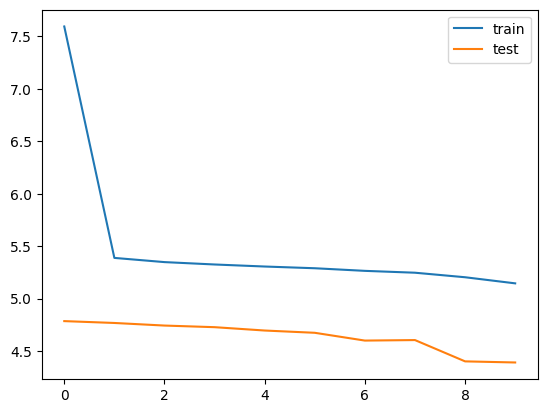

In [76]:
history = model.fit(train_x, train_y, epochs=10, batch_size=8, validation_data=(test_x, test_y), verbose=1, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [77]:
# model.save('1.h5')

In [78]:
x = np.array([[ 8,  2,  4,  0,  0,  0,  4,  0],
        [ 5,  0,  1,  0,  0,  0,  6,  3],
        [ 8,  0,  3,  0,  3,  0,  4,  0],
        [ 4,  0,  0,  1,  0,  0,  1,  0],
        [ 6,  0,  3,  1,  0,  0, 12,  0],
        [10,  0,  5,  0,  2,  0,  9,  1],
        [ 5,  0,  1,  0,  0,  0,  6,  1]])


In [79]:
x = x.reshape(1, x.shape[0], x.shape[1])
x.shape

(1, 7, 8)

In [80]:
y = model.predict(x)
y[0].shape

1/1 [==============================] - 1s 1s/step


(8,)